In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') # Evita di stampare i warning

# Definizione del problema

Il dataset in esame (https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction/data) contiene dati clinici di pazienti, nello specifico informazioni che potrebbero essere legate all'insufficienza caridaca. L'obiettivo è quello di prevedere, sulla base delle varie informazioni cliniche, se un paziente risulta a rischio di insufficienza caridaca (heart failure).

Nota: Con insufficienza cardiaca non si intende necessariamente arresto cardiaco, ma si tratta di una condizione che potrebbe causarlo.

In [2]:
dataset = pd.read_csv("heart.csv")

# Analisi del dataset

In [3]:
dataset.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


Descrizione delle feature:
- Age -> Età del paziente
- Sex -> Sesso del paziente
- ChestPainType -> Tipologia di dolore al petto:
    [*TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic*]
- RestingBP -> Pressione del sangue a riposo [*mmHg*]
- Cholesterol -> Livello di colesterolo [*mm/dl*]
- FastingBS -> Glicemia a digiuno:
    [*1: if FastingBS > 120 mg/dl, 0: otherwise*]
- RestingECG -> Risultati dell'elettrocardiogramma a riposo:
     [*Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria*]
- MaxHR -> Massimo numero di battiti raggiunto
- ExerciseAngina -> Presenza di angina da sforzo:
    [*Y: Yes, N: No*]
- Oldpeak -> Depressione del tratto ST misurata dall'elettrocardiogramma
- ST_Slope -> Inclinazione della porzione finale del tratto ST:
    [*Up: upsloping, Flat: flat, Down: downsloping*]
- HeartDesease -> Presenza di malattia cardiaca:
    [*1: heart disease, 0: Normal*]

La feature target è "HeartDesease" e tutte le altre feature saranno considerate utili (previa ulteriore analisi) ai fini della predizione.

In [4]:
print("dataset shape: " + str(dataset.shape) + "\n")
print(dataset.info())

dataset shape: (918, 12)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None


Il dataset non presenta valori assenti. Si noti inoltre che il dataset non presenta un grande numero di istanze, questo è da tenere in considerazione soprattutto nel caso in cui per qualche motivo si dovesse valutare se eliminare alcune istanze.

In [5]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


Per le feature categoriche si decide di utilizzare un approccio differente per la visualizzazione.

<function matplotlib.pyplot.show(close=None, block=None)>

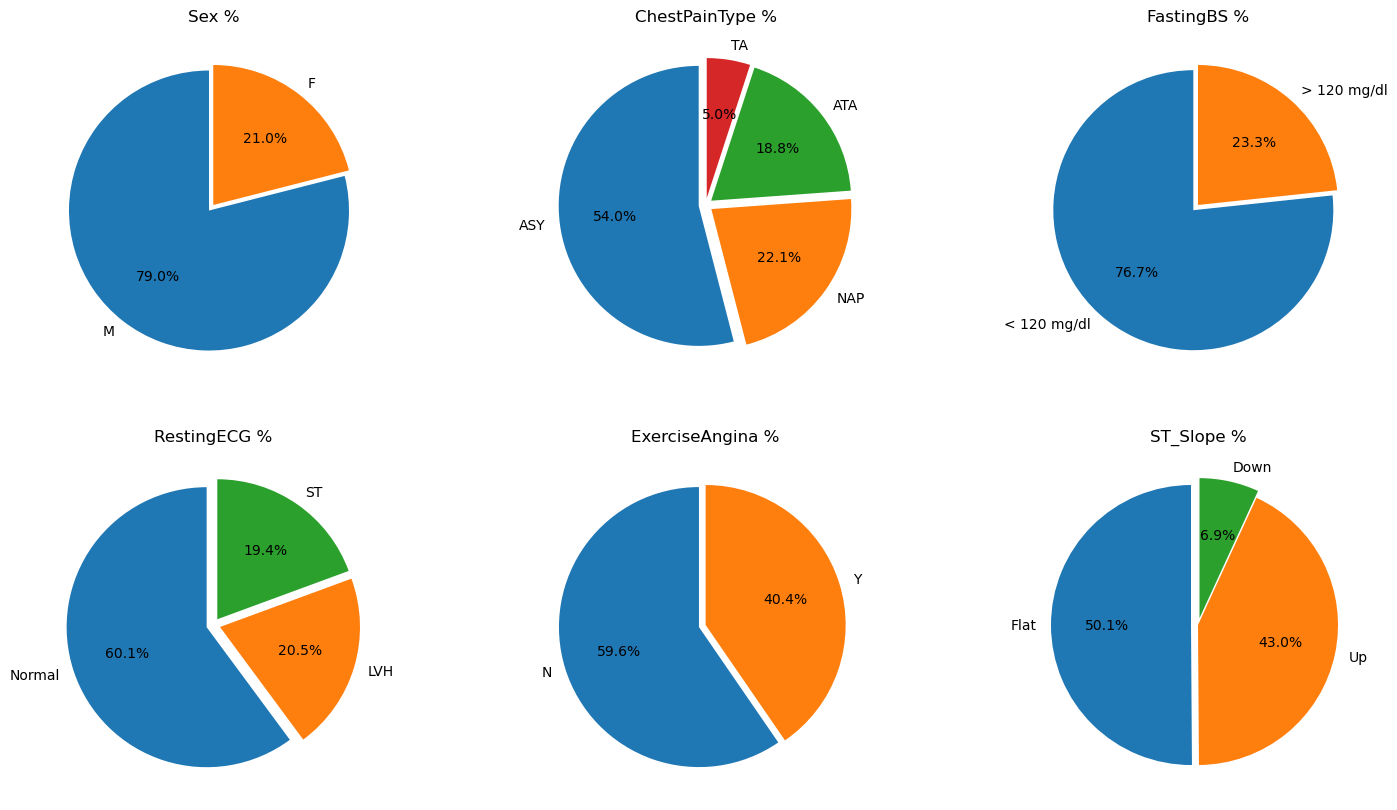

In [6]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(18,10))

# Sex feature subplot
plt.subplot(2,3,1)
feature_name = 'Sex'
counts = dataset[feature_name].value_counts()
plt.pie(counts.values, labels=counts.index, autopct='%1.1f%%',
        startangle=90, explode=(0.05, 0))
plt.title(feature_name + " %")

# ChestPainType feature subplot
plt.subplot(2,3,2)
feature_name = 'ChestPainType'
counts = dataset[feature_name].value_counts()
plt.pie(counts.values, labels=counts.index, autopct='%1.1f%%',
        startangle=90, explode=(0.05, 0.05, 0.05, 0.05))
plt.title(feature_name + " %")

# FastingBS feature subplot
plt.subplot(2,3,3)
feature_name = 'FastingBS'
counts = dataset[feature_name].value_counts()
label_mapping = {1: '> 120 mg/dl', 0: '< 120 mg/dl'}
labels = [label_mapping[val] for val in counts.index]
plt.pie(counts.values, labels=labels, autopct='%1.1f%%',
        startangle=90, explode=(0.05, 0))
plt.title(feature_name + " %")

# RestingECG feature subplot
plt.subplot(2,3,4)
feature_name = 'RestingECG'
counts = dataset[feature_name].value_counts()
plt.pie(counts.values, labels=counts.index, autopct='%1.1f%%',
        startangle=90, explode=(0.05, 0.05, 0.05))
plt.title(feature_name + " %")

# ExerciseAngina feature subplot
plt.subplot(2,3,5)
feature_name = 'ExerciseAngina'
counts = dataset[feature_name].value_counts()
plt.pie(counts.values, labels=counts.index, autopct='%1.1f%%',
        startangle=90, explode=(0.05, 0))
plt.title(feature_name + " %")

# ST_Slope feature subplot
plt.subplot(2,3,6)
feature_name = 'ST_Slope'
counts = dataset[feature_name].value_counts()
plt.pie(counts.values, labels=counts.index, autopct='%1.1f%%',
        startangle=90, explode=(0.05, 0, 0.05))
plt.title(feature_name + " %")

plt.show

Come si può notare dai grafici la maggior parte dei dati sono relativi alla popolazione maschile. Inoltre è importante tenere in considerazione che per ogni feature c'è un valore che prevale significativamete sugli altri; alcuni di questi risultati saranno ripresi in seguito.

## Analisi del bilanciamento delle classi target

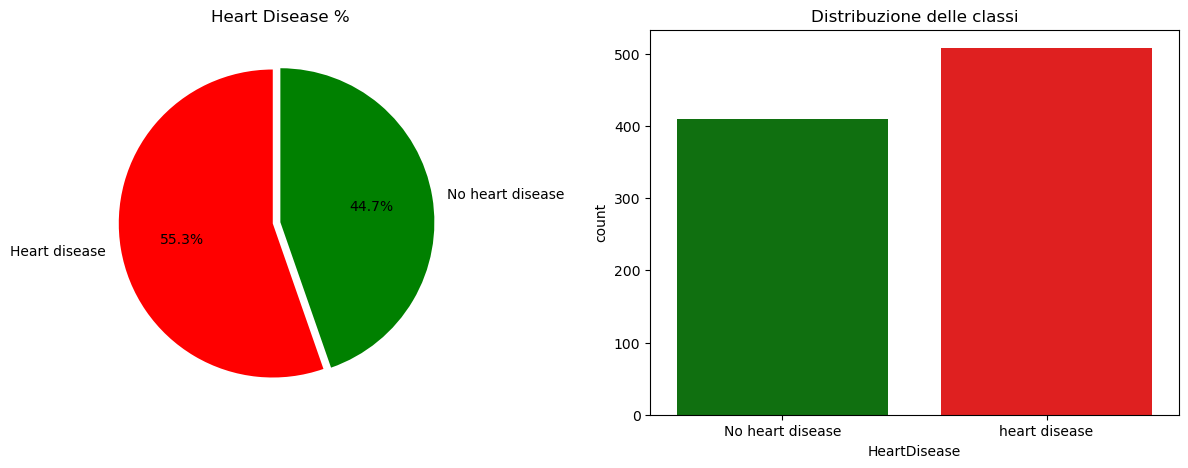

In [7]:
label_counts = dataset['HeartDisease'].value_counts()

fig, ax = plt.subplots(ncols=1, nrows=2, figsize=(15,5))

plt.subplot(1,2,1)
plt.pie(label_counts, labels=['Heart disease', 'No heart disease'], autopct='%1.1f%%',
        startangle=90, explode=(0.05,0), colors=['red', 'green'])
plt.title("Heart Disease %")

plt.subplot(1,2,2)
ax = sns.countplot(x='HeartDisease', data=dataset, palette=['green', 'red'])
ax.set_xticklabels(['No heart disease', 'heart disease'])
plt.title("Distribuzione delle classi")

plt.show()

Le classi risultano sbilanciate in modo lieve, pertanto si decide di non applicare alcuna tecnica di bianciamento.

## Analisi delle feature categoriche

Di seguito saranno analizzate, mediante l'ausilio di grafici, le feature categoriche presenti nel dataset.

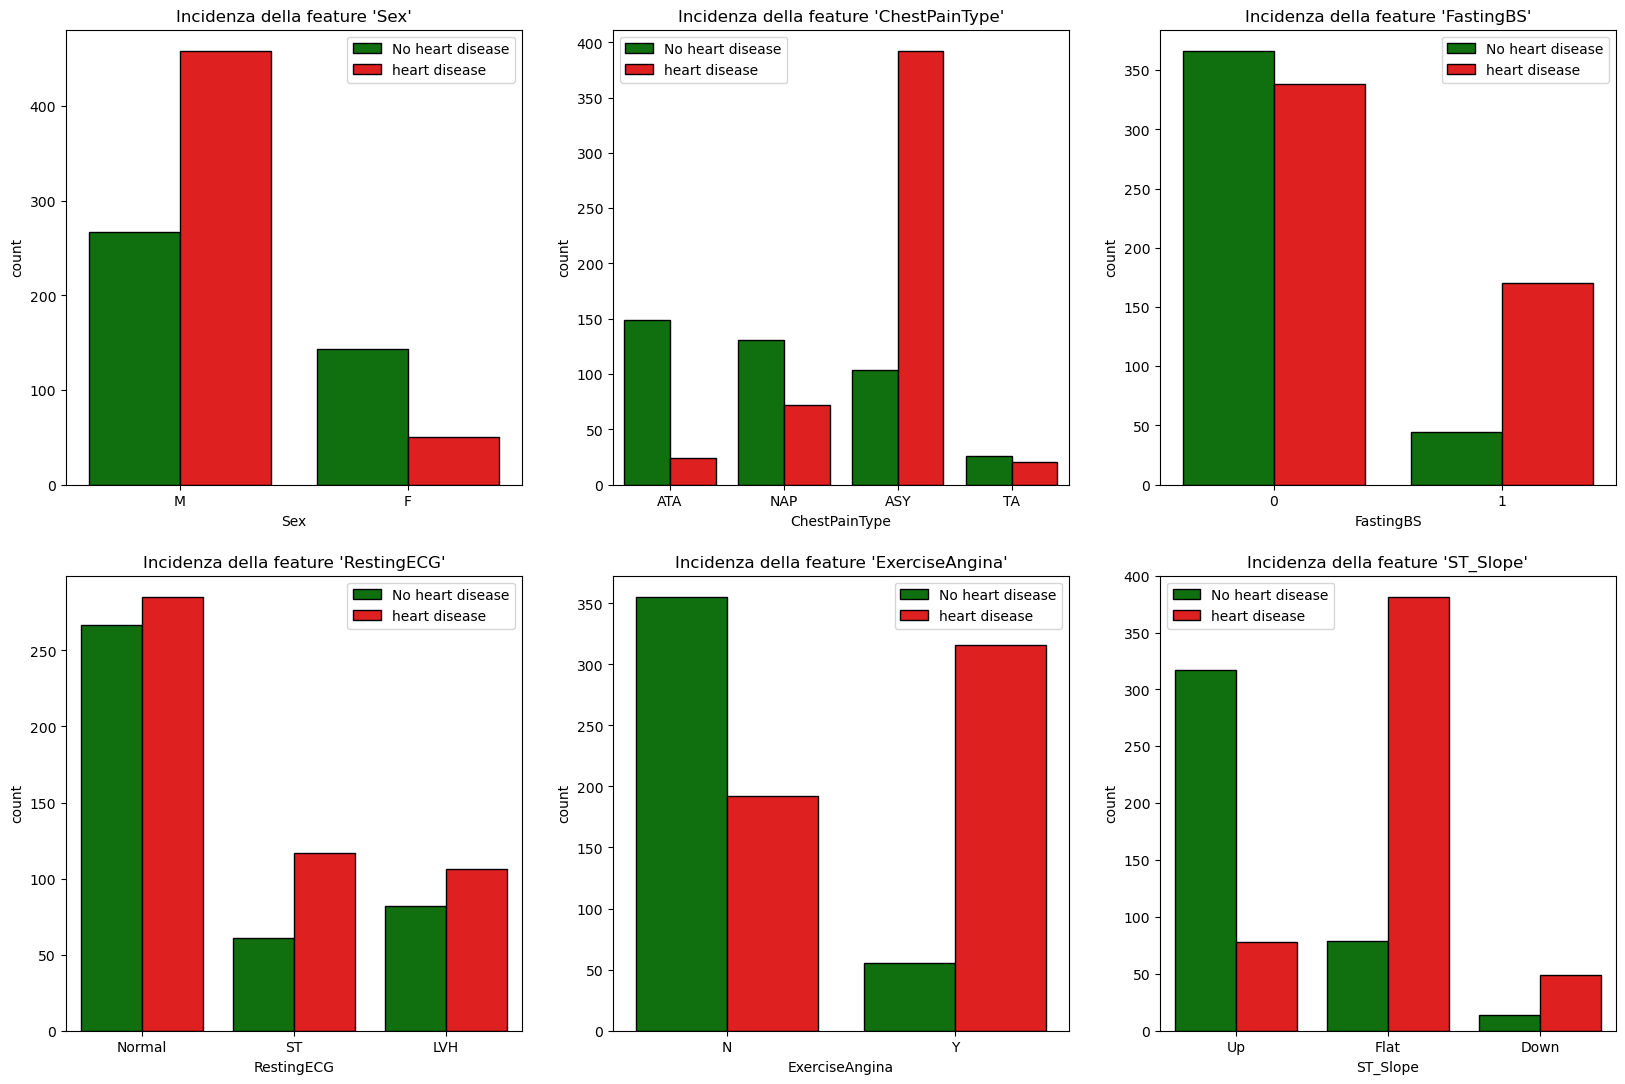

In [8]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20,13))

# plot Sex feature
plt.subplot(2,3,1)
feature_name = 'Sex'
ax = sns.countplot(x=feature_name, data=dataset, hue='HeartDisease', edgecolor='black', palette=['green', 'red'])
plt.legend(['No heart disease', 'heart disease'])
plt.title("Incidenza della feature '" + feature_name + "'")

# plot ChestPainType feature
plt.subplot(2,3,2)
feature_name = 'ChestPainType'
ax = sns.countplot(x=feature_name, data=dataset, hue='HeartDisease', edgecolor='black', palette=['green', 'red'])
plt.legend(['No heart disease', 'heart disease'])
plt.title("Incidenza della feature '" + feature_name + "'")

# plot FastingBS feature
plt.subplot(2,3,3)
feature_name = 'FastingBS'
ax = sns.countplot(x=feature_name, data=dataset, hue='HeartDisease', edgecolor='black', palette=['green', 'red'])
plt.legend(['No heart disease', 'heart disease'])
plt.title("Incidenza della feature '" + feature_name + "'")

# plot RestingECG feature
plt.subplot(2,3,4)
feature_name = 'RestingECG'
ax = sns.countplot(x=feature_name, data=dataset, hue='HeartDisease', edgecolor='black', palette=['green', 'red'])
plt.legend(['No heart disease', 'heart disease'])
plt.title("Incidenza della feature '" + feature_name + "'")

# plot ExerciseAngina feature
plt.subplot(2,3,5)
feature_name = 'ExerciseAngina'
ax = sns.countplot(x=feature_name, data=dataset, hue='HeartDisease', edgecolor='black', palette=['green', 'red'])
plt.legend(['No heart disease', 'heart disease'])
plt.title("Incidenza della feature '" + feature_name + "'")

# plot ST_Slope feature
plt.subplot(2,3,6)
feature_name = 'ST_Slope'
ax = sns.countplot(x=feature_name, data=dataset, hue='HeartDisease', edgecolor='black', palette=['green', 'red'])
plt.legend(['No heart disease', 'heart disease'])
plt.title("Incidenza della feature '" + feature_name + "'")

plt.show()

I grafici mostrano alcuni risultati interessanti, ad esempio si può notare come la popolazione maschile sia mediamente più soggetta ad avere problemi cardiaci, è però da ricordare che come mostrato in precedenza i dati relativi agli uomini sono molto più numerosi nel dataset. Inoltre, al contrario di quanto ci si potrebbe aspettare, i pazienti che non evidenziano dolori al petto (valore ASY "asintomatico" per la feature *ChestPainType*) risultano più soggetti ad avere problemi cardiaci, anche in questo caso però è importante ricordare che l'assenza di sintomi è prevalente nel dataset. Considerazioni simili possono essere fatte per le feature *ExerciseAngina* e *ST_Slope*.

## Analisi delle feature numeriche

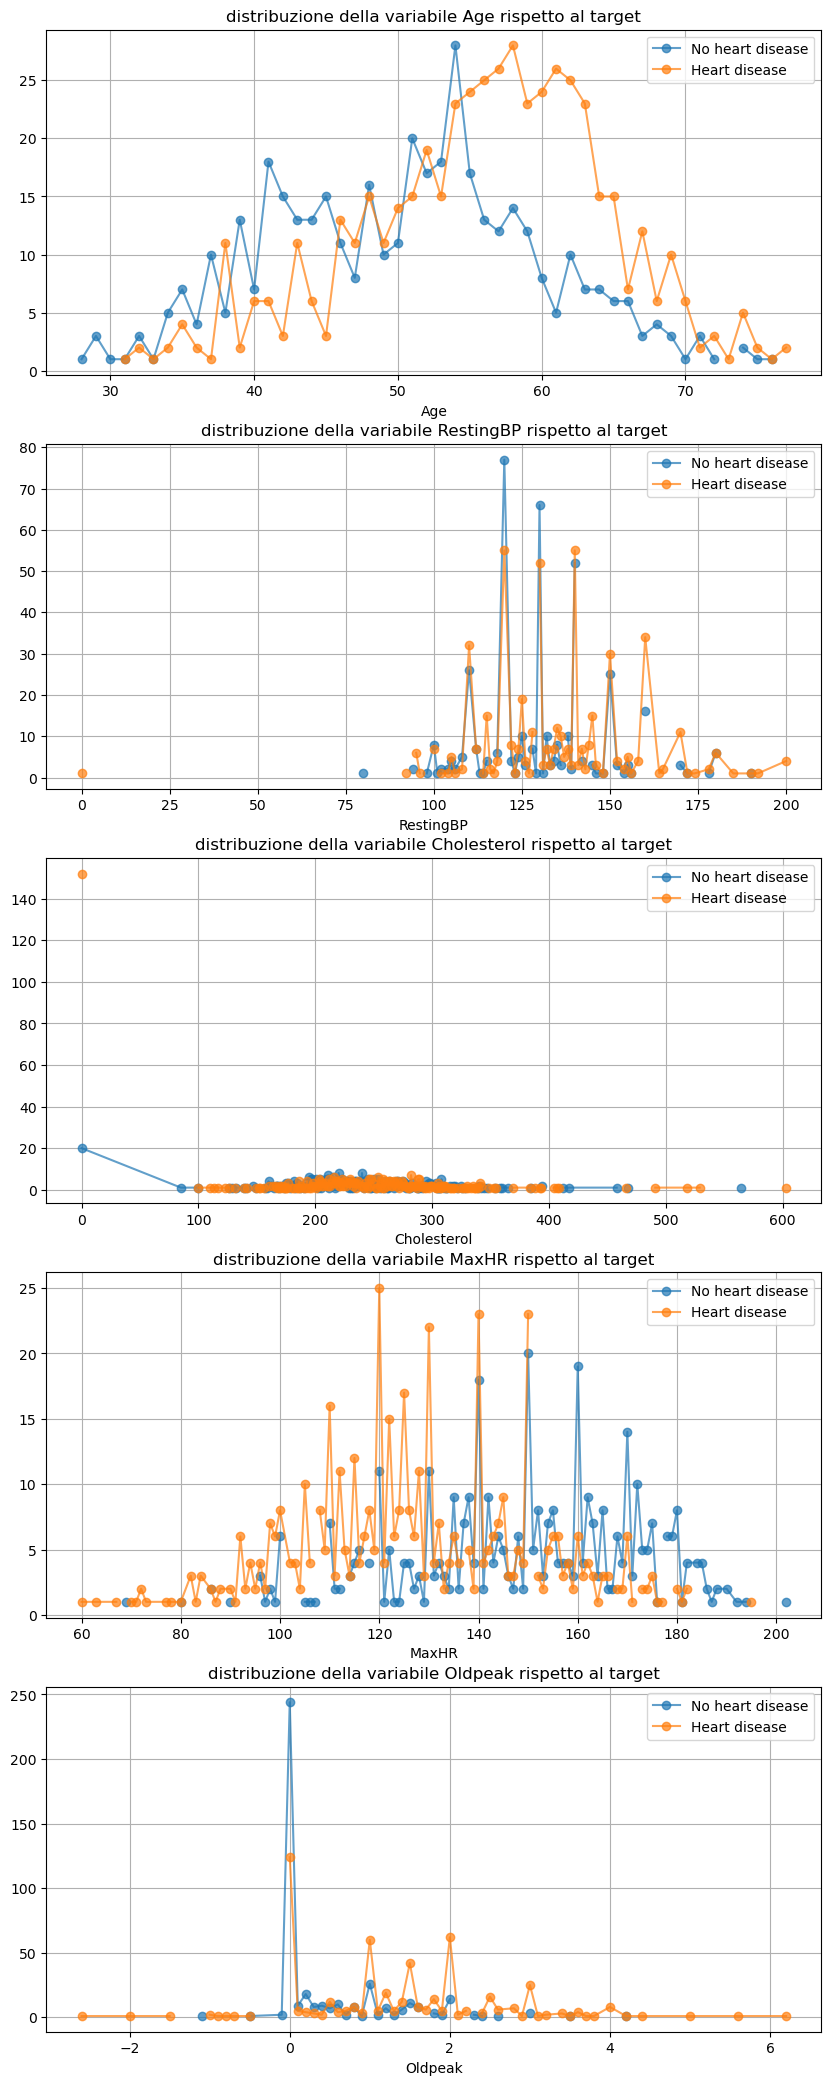

In [166]:
# 1 -> Heart disease, 0 -> Normal
fig, ax = plt.subplots(nrows=5, ncols=1, figsize=(10, 26))

# Age subplot
plt.subplot(5,1,1)
feature_name = 'Age'
counts = dataset[[feature_name, "HeartDisease"]].groupby([feature_name, "HeartDisease"]).size().unstack()
plt.plot(counts.index, counts[0], label="No heart disease", marker='o', alpha=0.7)
plt.plot(counts.index, counts[1], label="Heart disease", marker='o', alpha=0.7)
plt.xlabel(feature_name)
plt.title(f"distribuzione della variabile {feature_name} rispetto al target")
plt.legend()
plt.grid(True)

# RestingBP subplot
plt.subplot(5,1,2)
feature_name = 'RestingBP'
counts = dataset[[feature_name, "HeartDisease"]].groupby([feature_name, "HeartDisease"]).size().unstack()
plt.plot(counts.index, counts[0], label="No heart disease", marker='o', alpha=0.7)
plt.plot(counts.index, counts[1], label="Heart disease", marker='o', alpha=0.7)
plt.xlabel(feature_name)
plt.title(f"distribuzione della variabile {feature_name} rispetto al target")
plt.legend()
plt.grid(True)

# Cholesterol subplot
plt.subplot(5,1,3)
feature_name = 'Cholesterol'
counts = dataset[[feature_name, "HeartDisease"]].groupby([feature_name, "HeartDisease"]).size().unstack()
plt.plot(counts.index, counts[0], label="No heart disease", marker='o', alpha=0.7)
plt.plot(counts.index, counts[1], label="Heart disease", marker='o', alpha=0.7)
plt.xlabel(feature_name)
plt.title(f"distribuzione della variabile {feature_name} rispetto al target")
plt.legend()
plt.grid(True)

# MaxHR subplot
plt.subplot(5,1,4)
feature_name = 'MaxHR'
counts = dataset[[feature_name, "HeartDisease"]].groupby([feature_name, "HeartDisease"]).size().unstack()
plt.plot(counts.index, counts[0], label="No heart disease", marker='o', alpha=0.7)
plt.plot(counts.index, counts[1], label="Heart disease", marker='o', alpha=0.7)
plt.xlabel(feature_name)
plt.title(f"distribuzione della variabile {feature_name} rispetto al target")
plt.legend()
plt.grid(True)

# Oldpeak subplot
plt.subplot(5,1,5)
feature_name = 'Oldpeak'
counts = dataset[[feature_name, "HeartDisease"]].groupby([feature_name, "HeartDisease"]).size().unstack()
plt.plot(counts.index, counts[0], label="No heart disease", marker='o', alpha=0.7)
plt.plot(counts.index, counts[1], label="Heart disease", marker='o', alpha=0.7)
plt.xlabel(feature_name)
plt.title(f"distribuzione della variabile {feature_name} rispetto al target")
plt.legend()
plt.grid(True)

plt.show()



Esattamente come ci si poteva aspettare, la presenza di problemi cardiaci sembra essere più probabile con l'avanzare dell'età, inoltre una elevata frequenza cardiaca non sembra essere sintomo di problemi cardiaci. Per visualizzare al meglio i dati si decide di effettuare anche dei boxplot.

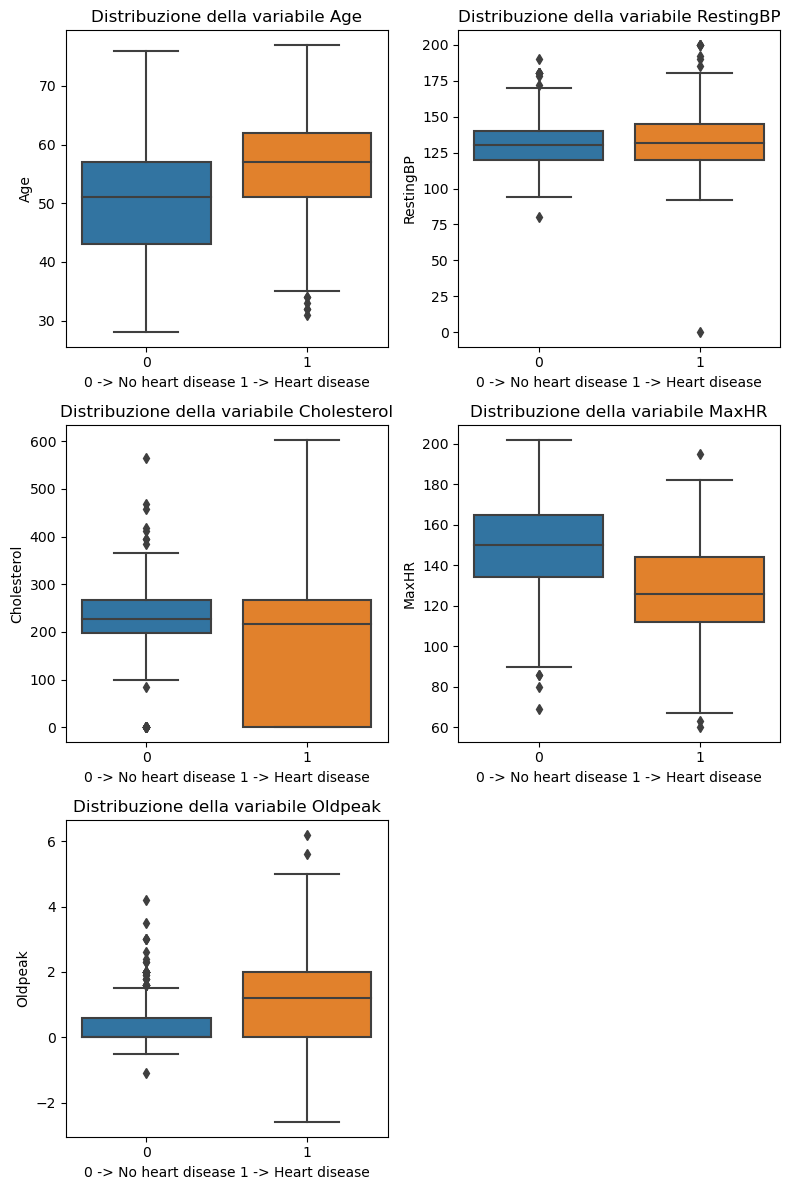

In [10]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(8, 12))

# Age Boxplot
feature_name = "Age"
sns.boxplot(x="HeartDisease", y=feature_name, data=dataset, ax=ax[0, 0])
ax[0,0].set_xlabel("0 -> No heart disease 1 -> Heart disease")
ax[0,0].set_ylabel(feature_name)
ax[0,0].set_title(f"Distribuzione della variabile {feature_name}")

# RestingBP Boxplot
feature_name = "RestingBP"
sns.boxplot(x="HeartDisease", y=feature_name, data=dataset, ax=ax[0, 1])
ax[0,1].set_xlabel("0 -> No heart disease 1 -> Heart disease")
ax[0,1].set_ylabel(feature_name)
ax[0,1].set_title(f"Distribuzione della variabile {feature_name}")

# Cholesterol Boxplot
feature_name = "Cholesterol"
sns.boxplot(x="HeartDisease", y=feature_name, data=dataset, ax=ax[1, 0])
ax[1,0].set_xlabel("0 -> No heart disease 1 -> Heart disease")
ax[1,0].set_ylabel(feature_name)
ax[1,0].set_title(f"Distribuzione della variabile {feature_name}")

# MaxHR Boxplot
feature_name = "MaxHR"
sns.boxplot(x="HeartDisease", y=feature_name, data=dataset, ax=ax[1, 1])
ax[1,1].set_xlabel("0 -> No heart disease 1 -> Heart disease")
ax[1,1].set_ylabel(feature_name)
ax[1,1].set_title(f"Distribuzione della variabile {feature_name}")

# Oldpeak Boxplot
feature_name = "Oldpeak"
sns.boxplot(x="HeartDisease", y=feature_name, data=dataset, ax=ax[2, 0])
ax[2,0].set_xlabel("0 -> No heart disease 1 -> Heart disease")
ax[2,0].set_ylabel(feature_name)
ax[2,0].set_title(f"Distribuzione della variabile {feature_name}")

ax[2,1].set_visible(False)

plt.tight_layout()
plt.show()

Da entrambe le tipologie di grafico si può osservare come la feature *Cholesterol* presenti dei valori probabilmente errati, in quanto esistono numerose istanze che assumono valore 0, il quale però non è attendibile per quanto riguarda la rilevazione del colesterolo nel sangue. In seguito si valuterà se mantenere la feature *Cholesterol* o se eliminarla dalle feature utilizate per la predizione. Inoltre dai grafici sembra che la feature *RestingBP* non sia particolarmente incisiva confrontata con la variabile target.

# Preparazione del dataset per l'addestramento

## Encoding delle feature categoriche

A causa della presenza di numerose feature categoriche si decide di utilizzare il One-Hot Encoding.

In [11]:
one_hot_features = ["Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope"] 
# La feature FastingBS può essere utilizzata senza modifiche.

df = pd.get_dummies(dataset, columns=one_hot_features)

print(df.head())

   Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease  \
0   40        140          289          0    172      0.0             0   
1   49        160          180          0    156      1.0             1   
2   37        130          283          0     98      0.0             0   
3   48        138          214          0    108      1.5             1   
4   54        150          195          0    122      0.0             0   

   Sex_F  Sex_M  ChestPainType_ASY  ...  ChestPainType_NAP  ChestPainType_TA  \
0      0      1                  0  ...                  0                 0   
1      1      0                  0  ...                  1                 0   
2      0      1                  0  ...                  0                 0   
3      1      0                  1  ...                  0                 0   
4      0      1                  0  ...                  1                 0   

   RestingECG_LVH  RestingECG_Normal  RestingECG_ST  ExerciseAngina_

## Suddivisione in Train e Test set

In [12]:
from sklearn.model_selection import train_test_split

X = df.drop(columns='HeartDisease')
y = df['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)
# Si sceglie di utilizzare soltanto il 20% delle righe del dataset a causa delle sue ridotte dimensioni.

# Numerical Features names
numerical_features = ["Age", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak"]

# Funzioni di Utilità

In [143]:
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer

# Si utilizza standard scaler solo sulle feature numeriche
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features)
    ],
    remainder='passthrough'
)

def plot_confusion_matrix(y_true, y_pred, class_order=[0, 1], class_labels=['Normal', 'Heart disease']):

    cm = confusion_matrix(y_true, y_pred, labels=class_order)

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel('Predetto')
    plt.ylabel('Reale')
    plt.title("Matrice di confusione")
    plt.tight_layout()
    plt.show()

def plot_classification_report(report_dict, include_avg=True, figsize=(10, 6), cmap='Greens'):
    df = pd.DataFrame(report_dict).transpose()
    df = df.drop(columns=['support'], errors='ignore')
    if not include_avg:
        df = df.loc[~df.index.str.contains('avg')]

    df = df[['precision', 'recall', 'f1-score']]

    ax = df.plot(kind='barh', figsize=figsize, colormap=cmap, edgecolor='black')

    for container in ax.containers:
        ax.bar_label(container, fmt='%.4f', label_type='edge', padding=3, fontsize=8)

    plt.title("Classification Report Metrics")
    plt.xlabel("Score")
    plt.xlim(0, 1.05)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.gca().invert_yaxis()
    ax.legend(loc='lower left')
    plt.tight_layout()
    plt.show()

def plot_feature_importance(model, feature_names, top_n=20):
    coefs = model.coef_.flatten()

    feature_importance = pd.Series(coefs, index=feature_names)

    top_features = feature_importance.abs().sort_values(ascending=False).head(top_n).index

    top_coefs = feature_importance[top_features]

    plt.figure(figsize=(10, 6))
    colors = ['green' if c > 0 else 'red' for c in top_coefs]
    top_coefs.plot(kind='barh', color=colors)
    plt.xlabel('Coefficient Value')
    plt.title('Top Feature Importances')
    plt.gca().invert_yaxis()
    plt.show()

# Modelli

## Perceptron

In [239]:
from sklearn.linear_model import Perceptron

perceptron_with_stdscaler = Pipeline([
    ('std', preprocessor),
    ('perceptron', Perceptron(random_state=27))
])

perceptron_parameters = {
    'perceptron__penalty': [None, 'l1', 'l2', 'elasticnet'],
    'perceptron__alpha': [0.0001, 0.001, 0.01, 0.1, 1]
}

perceptron_cv = GridSearchCV(perceptron_with_stdscaler, perceptron_parameters, cv=3, scoring='f1', refit=True, n_jobs=-1)
perceptron_cv.fit(X_train, y_train)

,estimator,Pipeline(step...m_state=27))])
,param_grid,"{'perceptron__alpha': [0.0001, 0.001, ...], 'perceptron__penalty': [None, 'l1', ...]}"
,scoring,'f1'
,n_jobs,-1
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('num', ...)]"


In [240]:
print('Migliori parametri: ', perceptron_cv.best_params_)   
print('Miglior punteggio: ', perceptron_cv.best_score_)

Migliori parametri:  {'perceptron__alpha': 0.0001, 'perceptron__penalty': 'l2'}
Miglior punteggio:  0.8439723311015074


Accuracy:  0.8260869565217391


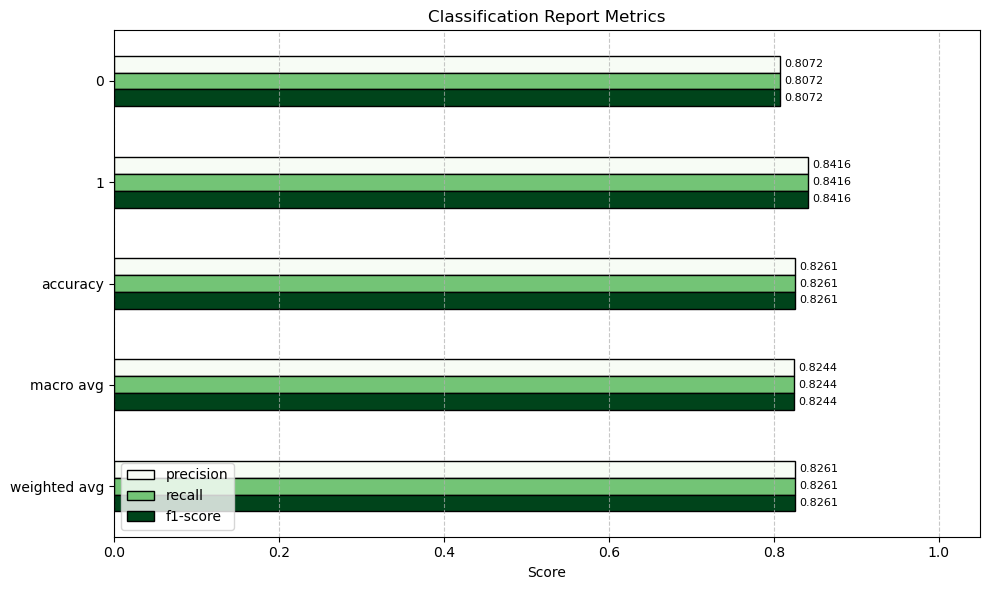

In [242]:
best_perceptron = perceptron_cv.best_estimator_

perceptron_pred = best_perceptron.predict(X_test)
perceptron_cr = classification_report(y_test, perceptron_pred, output_dict=True)
print("Accuracy: ", perceptron_cr['accuracy'])
plot_classification_report(perceptron_cr)

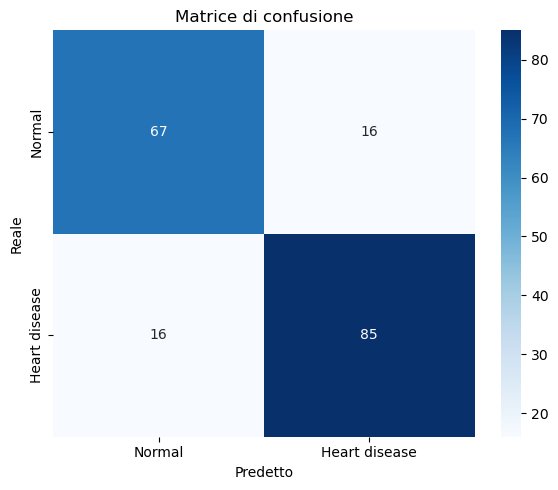

In [243]:
plot_confusion_matrix(y_test, perceptron_pred)

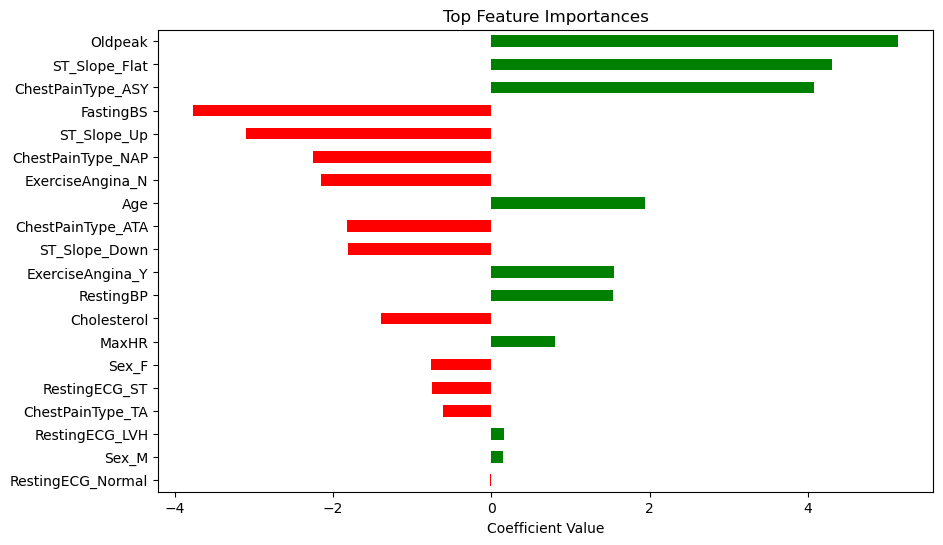

In [244]:
plot_feature_importance(best_perceptron.named_steps['perceptron'], X_train.columns)

Il modello Perceptron sembra ottenere buoni risultati, inoltre osservando il grafico dell'importanza delle feature si può notare come la feature *Cholesterol* sia rilevante, ma prima di abbandonare completamente l'idea di non includerla nell'addestramento si vuole effettuare un confronto utilizzando un modello simile in assenza della feature. Al contrario di quanto appariva dai grafici sembra che la feature *RestingBP* sia rilevante ai fini della predizione (Almeno per quanto riguarda questo modello).

### Perceptron senza feature Cholesterol

Migliori parametri:  {'perceptron__alpha': 0.0001, 'perceptron__penalty': 'l2'}
Miglior punteggio:  0.8375617371521047
Accuracy:  0.8206521739130435


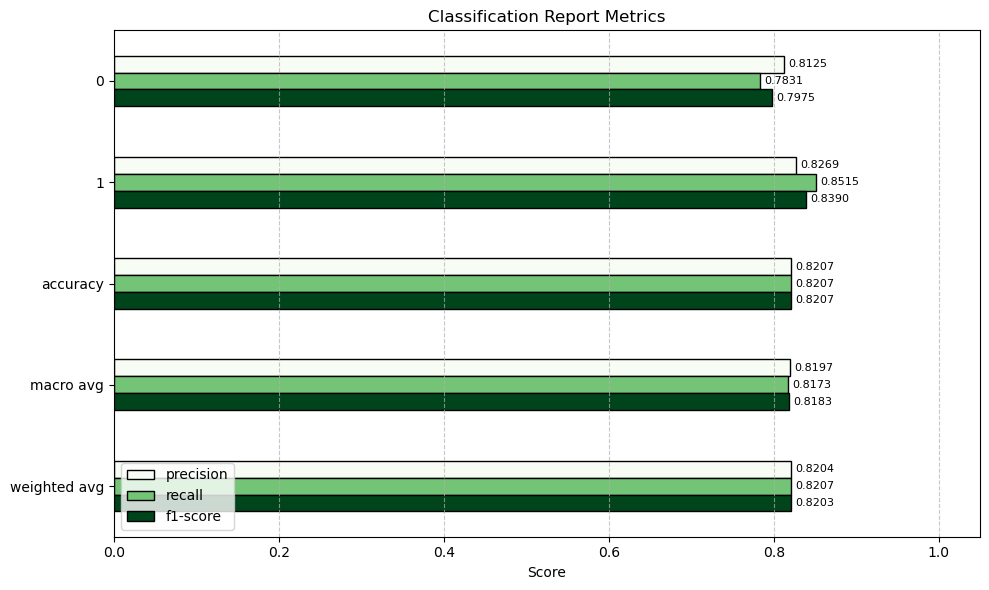

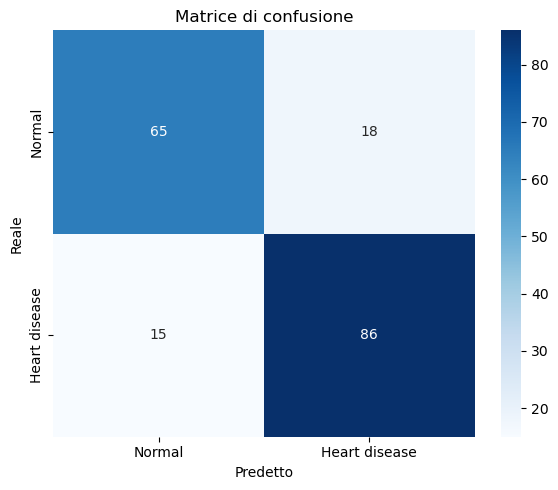

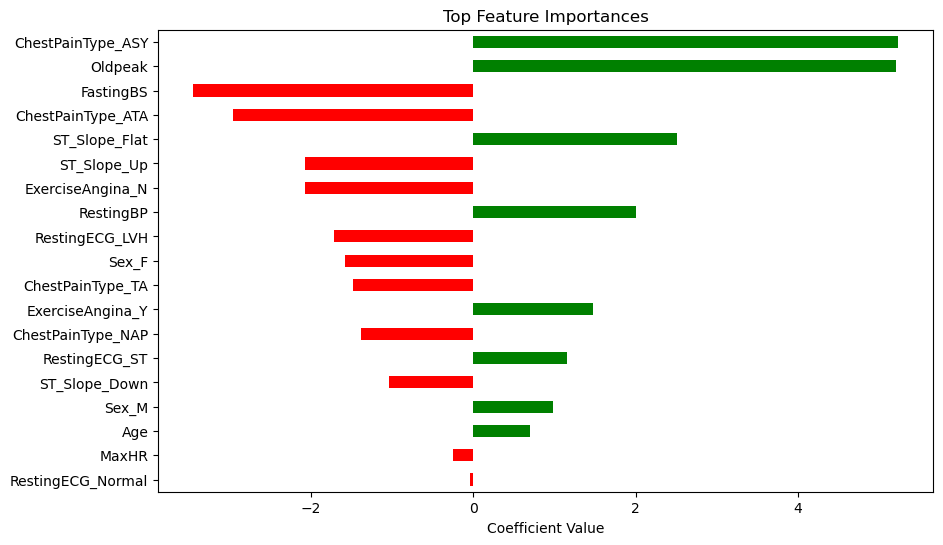

In [235]:
numerical_features_nC = ["Age", "RestingBP", "MaxHR", "Oldpeak"]

preprocessor_nC = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features_nC)
    ],
    remainder='passthrough'
)

perceptron_nC = Pipeline([
    ('std', preprocessor_nC),
    ('perceptron', Perceptron(random_state=27))
])

perceptron_cv_noCholesterol = GridSearchCV(perceptron_nC, perceptron_parameters, cv=3, scoring='f1', refit=True, n_jobs=-1)

X_train_noCholesterol = X_train.drop(columns=['Cholesterol'])
X_test_noCholesterol = X_test.drop(columns=['Cholesterol'])

perceptron_cv_noCholesterol.fit(X_train_noCholesterol, y_train)

print('Migliori parametri: ', perceptron_cv_noCholesterol.best_params_)
print('Miglior punteggio: ', perceptron_cv_noCholesterol.best_score_)

best_perceptron_nC = perceptron_cv_noCholesterol.best_estimator_
perceptron_nC_pred = best_perceptron_nC.predict(X_test_noCholesterol)

perceptron_nC_cr = classification_report(y_test, perceptron_nC_pred, output_dict=True)
print("Accuracy: ", perceptron_nC_cr['accuracy'])
plot_classification_report(perceptron_nC_cr)

plot_confusion_matrix(y_test, perceptron_nC_pred)

plot_feature_importance(best_perceptron_nC.named_steps['perceptron'], X_train_noCholesterol.columns)

In assenza della feature *Cholesterol* le performance del modello risultano simili. Questa prova non è pertanto sufficiente a determinare se abbia senso o meno rimuovere la feature. Si procederà con ulteriori test con modelli differenti.

## Logistic Regression

In [248]:
from sklearn.linear_model import LogisticRegression

logisticRegression_stdScaler = Pipeline([
    ('std', preprocessor),
    ('lr', LogisticRegression(random_state=27))
])

lr_parameters = {
    'lr__penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'lr__C': [0.001, 0.01, 0.1, 1, 10],
    'lr__class_weight': [None, 'balanced'],
    'lr__solver': ['saga']
}

lr_cv = GridSearchCV(logisticRegression_stdScaler, lr_parameters, cv=3, scoring='f1', refit=True, n_jobs=-1)
lr_cv.fit(X_train, y_train) 

,estimator,Pipeline(step...m_state=27))])
,param_grid,"{'lr__C': [0.001, 0.01, ...], 'lr__class_weight': [None, 'balanced'], 'lr__penalty': ['l1', 'l2', ...], 'lr__solver': ['saga']}"
,scoring,'f1'
,n_jobs,-1
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('num', ...)]"


In [249]:
print('Migliori parametri: ', lr_cv.best_params_)
print('Miglior punteggio: ', lr_cv.best_score_)

Migliori parametri:  {'lr__C': 1, 'lr__class_weight': None, 'lr__penalty': 'l2', 'lr__solver': 'saga'}
Miglior punteggio:  0.8785981628667946


Accuracy:  0.8913043478260869


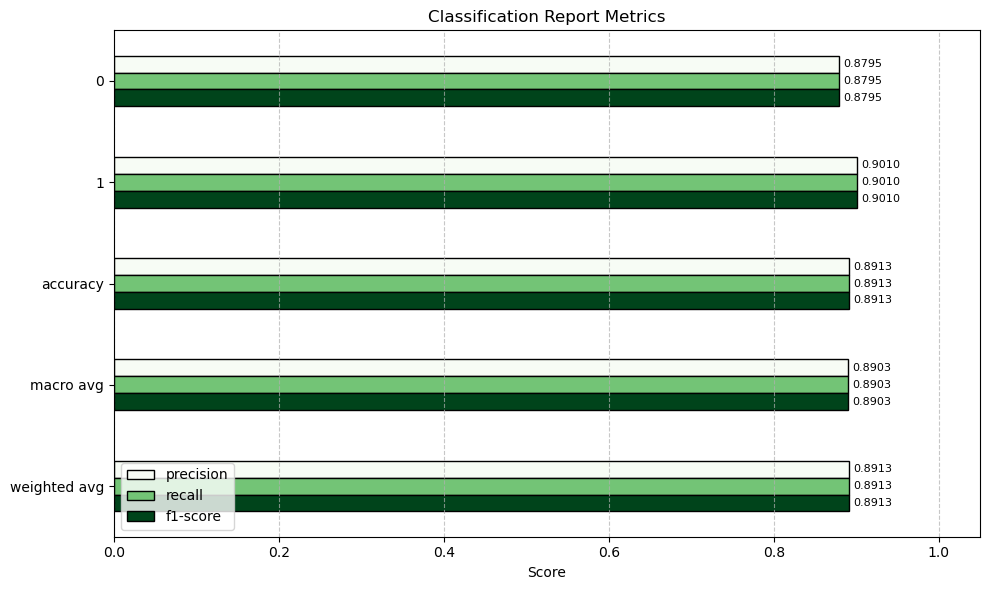

In [251]:
best_lr = lr_cv.best_estimator_

lr_pred = best_lr.predict(X_test)
lr_cr = classification_report(y_test, lr_pred, output_dict=True)
print("Accuracy: ", lr_cr['accuracy'])
plot_classification_report(lr_cr)

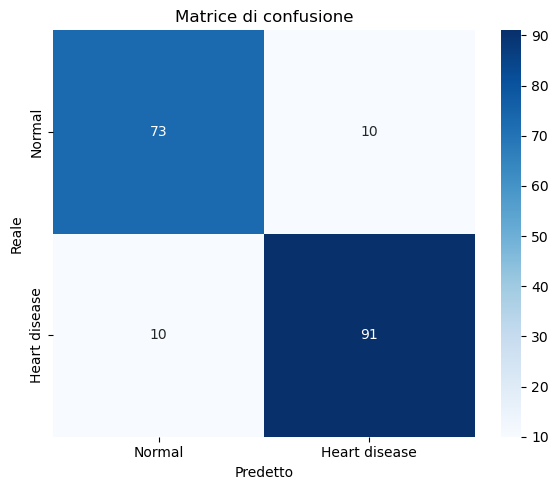

In [252]:
plot_confusion_matrix(y_test, lr_pred)

Data la natura del problema è fondamentale osservare i risultati della matrice di confusione e i risultati relativi alle singole classi, in quanto affermare la presenza di una malattia cardiaca in un paziente che realmente non ce l'ha è meno grave rispetto al non rilevare la malattia nel caso di un paziente che invece ce l'ha.

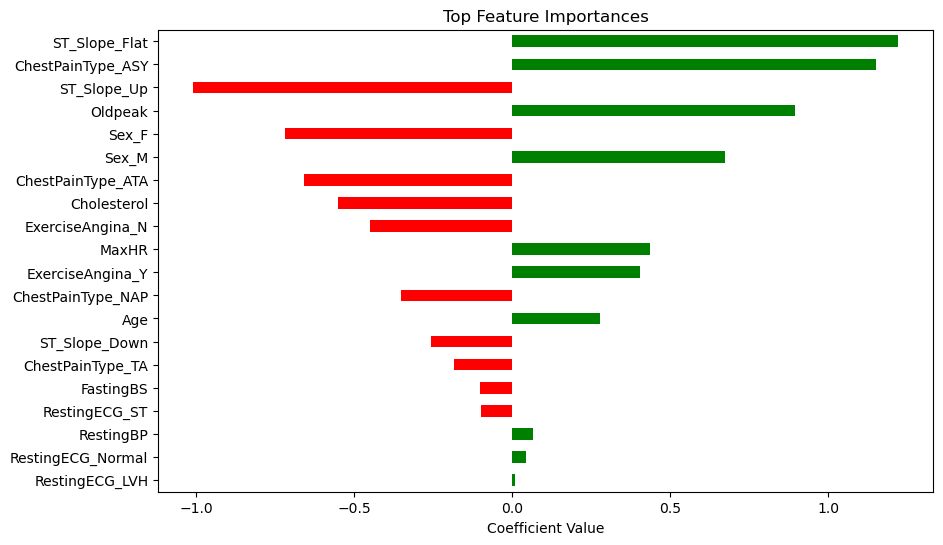

In [253]:
plot_feature_importance(best_lr.named_steps['lr'], X_train.columns)

Logistic Regression sembra ottenere risultati migliori di Perceptron. È inoltre interessante osservare come i due modelli attribuiscano diversa importanza alle varie feature.

### Logistic Regression senza Cholesterol

Migliori parametri:  {'lr__C': 10, 'lr__class_weight': None, 'lr__penalty': 'l1', 'lr__solver': 'saga'}
Miglior punteggio:  0.8746786888336714
Accuracy:  0.8913043478260869


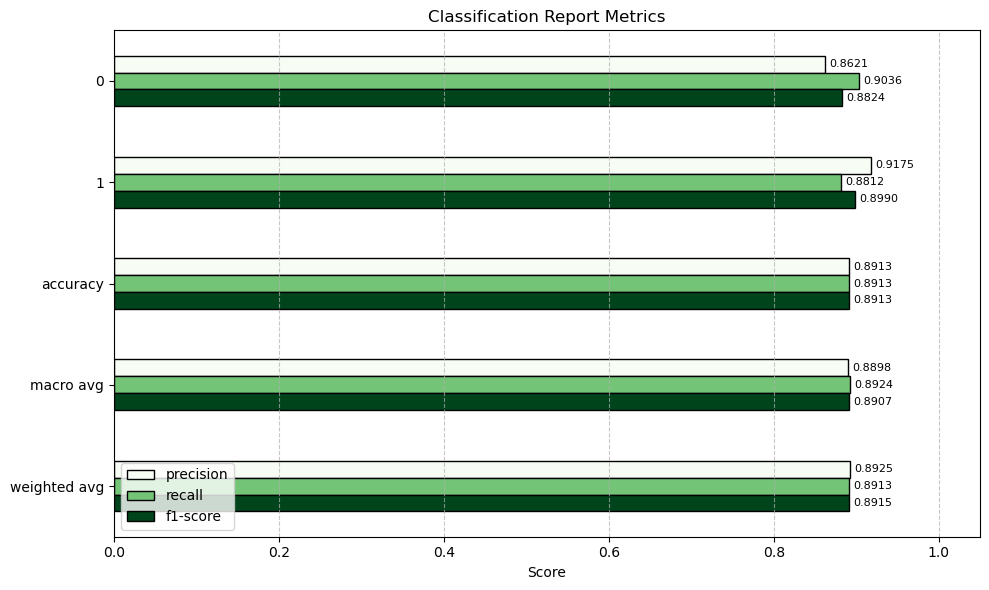

In [255]:
logisticRegression_stdScaler_nC = Pipeline([
    ('std', preprocessor_nC),
    ('lr', LogisticRegression(random_state=27))
])

lr_parameters = {
    'lr__penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'lr__C': [0.001, 0.01, 0.1, 1, 10],
    'lr__class_weight': [None, 'balanced'],
    'lr__solver': ['saga']
}

lr_cv_nC = GridSearchCV(logisticRegression_stdScaler_nC, lr_parameters, cv=3, scoring='f1', refit=True, n_jobs=-1)
lr_cv_nC.fit(X_train_noCholesterol, y_train) 

print('Migliori parametri: ', lr_cv_nC.best_params_)
print('Miglior punteggio: ', lr_cv_nC.best_score_)

best_lr_nC = lr_cv_nC.best_estimator_

lr_pred_nC = best_lr_nC.predict(X_test_noCholesterol)
lr_cr_nC = classification_report(y_test, lr_pred_nC, output_dict=True)
print("Accuracy: ", lr_cr_nC['accuracy'])
plot_classification_report(lr_cr_nC)

Ancora una volta l'assenza della feature *Cholesterol* non sembra incidere particolarmente sui punteggi del modello. Pertanto si decide di mantenere l'utilizzo della feature nei modelli successivi, nonostante sarebbero necessari ulteriori test per determinare se questa sia la decisione corretta. 

## SVM

In [268]:
from sklearn.svm import SVC

svm = Pipeline([
    ('std', preprocessor),
    ('svm', SVC(random_state=27))
])

svm_parameters = {
    'svm__kernel': ['linear', 'rbf', 'poly'],
    'svm__C': [0.001, 0.1, 1, 10],
}

svm_cv = GridSearchCV(svm, svm_parameters, cv=3, scoring='f1', refit=True, n_jobs=-1)
svm_cv.fit(X_train, y_train)

,estimator,Pipeline(step...m_state=27))])
,param_grid,"{'svm__C': [0.001, 0.1, ...], 'svm__kernel': ['linear', 'rbf', ...]}"
,scoring,'f1'
,n_jobs,-1
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('num', ...)]"


In [269]:
print('Migliori parametri: ', svm_cv.best_params_)
print('Miglior punteggio: ', svm_cv.best_score_)

Migliori parametri:  {'svm__C': 1, 'svm__kernel': 'rbf'}
Miglior punteggio:  0.8806267134806062


Accuracy:  0.8913043478260869


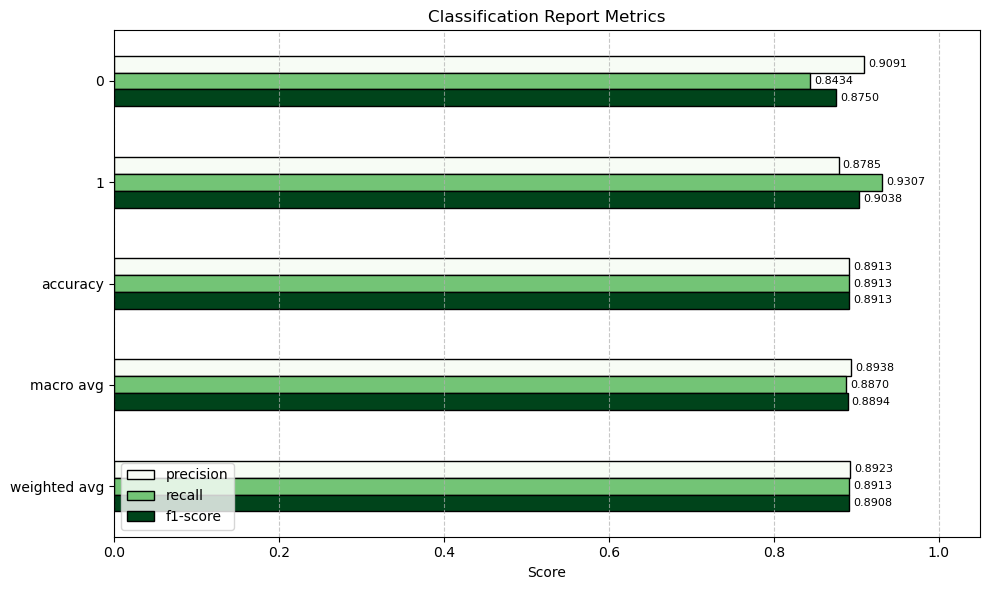

In [270]:
best_svm = svm_cv.best_estimator_

svm_pred = best_svm.predict(X_test)
svm_cr = classification_report(y_test, svm_pred, output_dict=True)
print("Accuracy: ", svm_cr['accuracy'])
plot_classification_report(svm_cr)

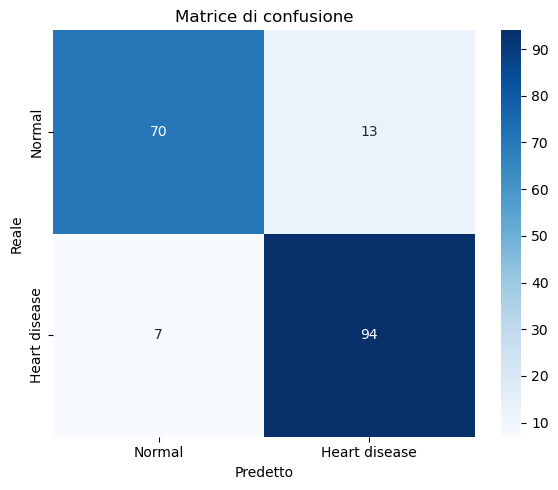

In [271]:
plot_confusion_matrix(y_test, svm_pred)

## XGBoost

In [260]:
from xgboost import XGBClassifier

xgb = XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False)

xgb_parameters = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'subsambple': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.5, 0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.1, 1],               # L1
    'reg_lambda': [0, 0.1, 1, 10]           # L2
}

xgb_cv = GridSearchCV(xgb, xgb_parameters, cv=3, scoring='f1', refit=True, n_jobs=-1)
xgb_cv.fit(X_train, y_train)

,estimator,"XGBClassifier...ree=None, ...)"
,param_grid,"{'colsample_bytree': [0.5, 0.6, ...], 'learning_rate': [0.01, 0.1], 'max_depth': [3, 5, ...], 'n_estimators': [100, 200], ...}"
,scoring,'f1'
,n_jobs,-1
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,objective,'binary:logistic'


In [261]:
print('Migliori parametri: ', xgb_cv.best_params_)
print('Miglior punteggio: ', xgb_cv.best_score_)

Migliori parametri:  {'colsample_bytree': 0.5, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100, 'reg_alpha': 0, 'reg_lambda': 10, 'subsambple': 0.6}
Miglior punteggio:  0.8886085648893255


Accuracy:  0.9021739130434783


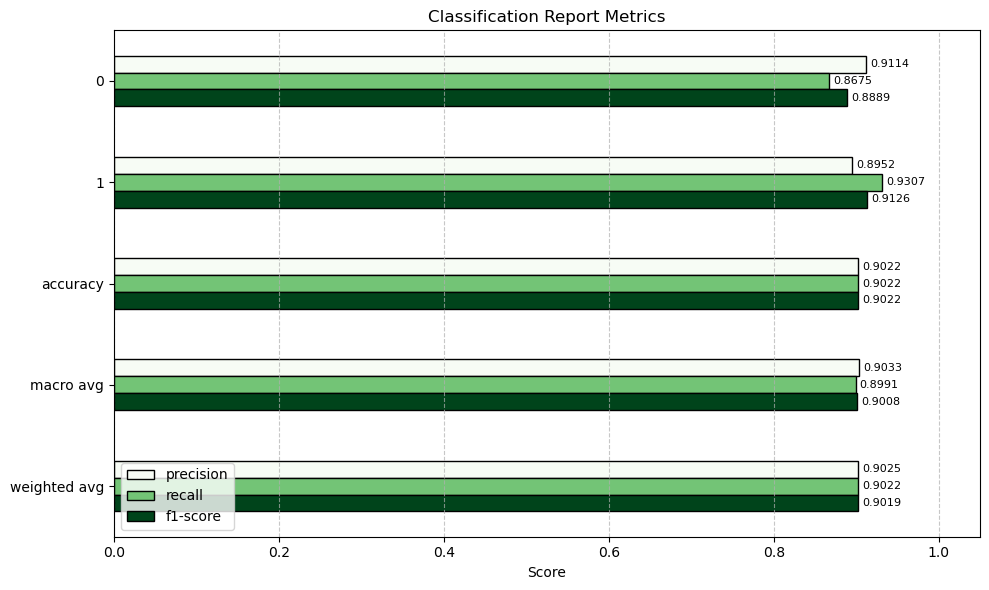

In [262]:
best_xgb = xgb_cv.best_estimator_

xgb_pred = best_xgb.predict(X_test)
xgb_cr = classification_report(y_test, xgb_pred, output_dict=True)
print("Accuracy: ", xgb_cr['accuracy'])
plot_classification_report(xgb_cr)

Anche XGB ottiene prestazioni simili, tuttavia ottiene un punteggio di recall per la classe 1 significativamente migliore.

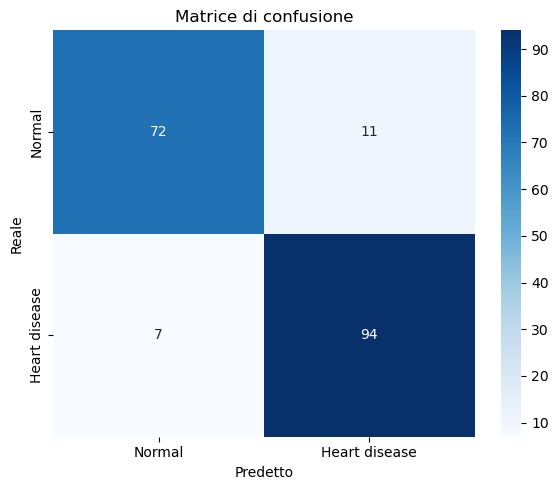

In [263]:
plot_confusion_matrix(y_test, xgb_pred)

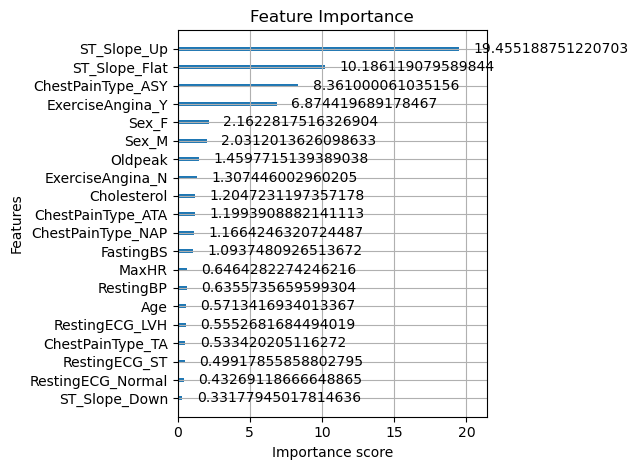

In [264]:
from xgboost import plot_importance

plot_importance(best_xgb, importance_type='gain')
plt.title("Feature Importance")
plt.tight_layout()
plt.show()

Nel caso del modello XGB l'importanza delle feature è assegnata sulla base di quanto ogni feature ha contribuito a migliorare le predizioni. Come si può notare ogni modello assegna un'importanza diversa alle feature, anche se alcune feature sembrano essere generalmente più importanti.
Come si è potuto osservare dai grafici di esplorazione delle feature, le feature *Sex*, *ST_Slope*, *ChestPainType* e *ExerciseAngina* risultano rilevanti nei vari modelli, anche la feature *Cholesterol* sembra essere rilevante nonostante i dubbi iniziali.
Il fatto che i vari modelli utilizzino tutte le feature (o quasi), indica che il dataset è costruito in maniera adeguata.

## Neural Network

### Scaling dei dati separato

In [34]:
model_preprocessor = preprocessor

X_train_processed = model_preprocessor.fit_transform(X_train)
X_test_processed = model_preprocessor.transform(X_test)

### Modello semplice di prova

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

simple_model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train_processed.shape[1],)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

simple_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = simple_model.fit(X_train, y_train, epochs=40, batch_size=8, validation_split=0.1, verbose=0)

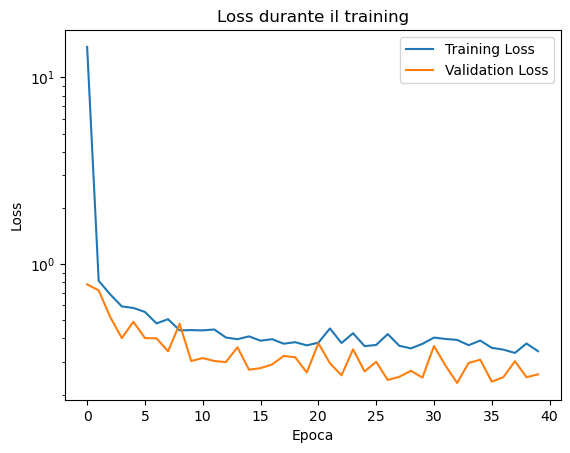

In [97]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.yscale('log')
plt.title('Loss durante il training')
plt.xlabel('Epoca')
plt.ylabel('Loss')
plt.legend()
plt.show()

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Accuracy:  0.782608695652174


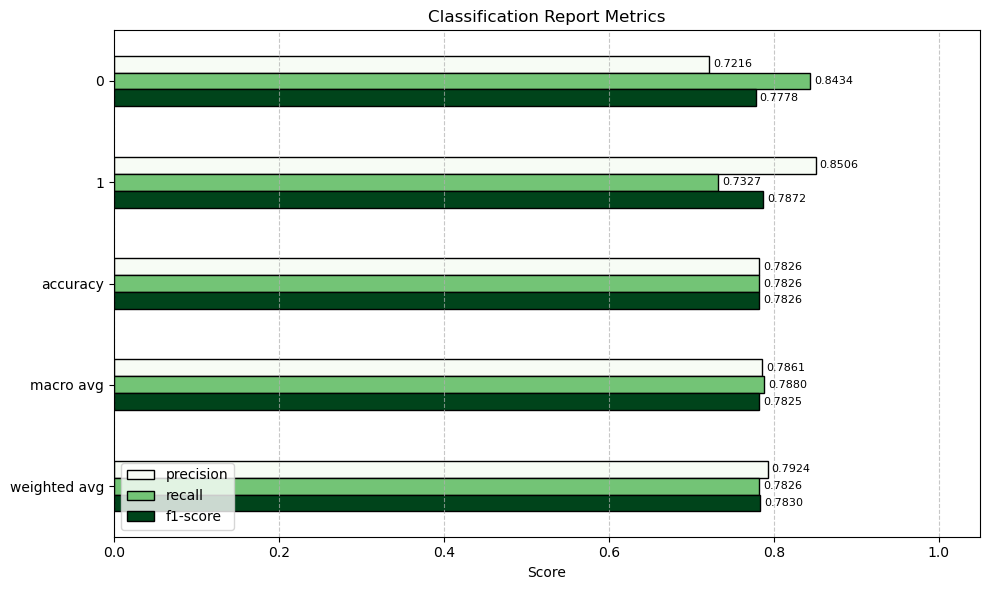

In [151]:
simple_model_probs = simple_model.predict(X_test_processed)
simple_model_pred = (simple_model_probs >= 0.5).astype(int)

simple_model_cr = classification_report(y_test, simple_model_pred, output_dict=True)
print("Accuracy: ", simple_model_cr['accuracy'])
plot_classification_report(simple_model_cr)

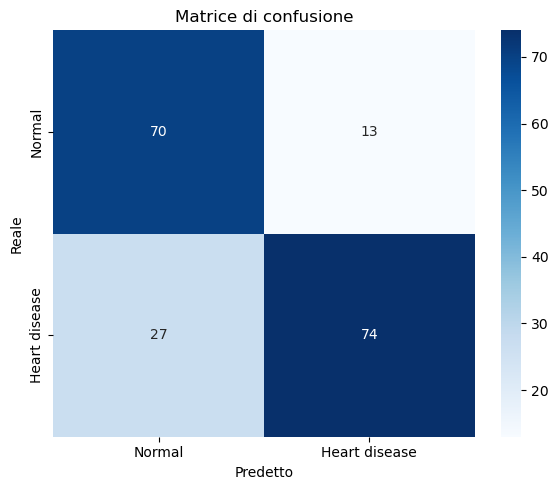

In [99]:
plot_confusion_matrix(y_test, simple_model_pred)

La rete neurale semplice risulta essere il modello peggiore ottenuto fino ad ora, è chiaro però che essendo un modello più complesso necesita di più attenzione nella scelta degli iperparametri. Per questo motivo si decide di utilizzare una GridSearch anche per la scelta degli iperparametri della rete neurale.

### Modello con Grid Search

In [101]:
from scikeras.wrappers import KerasClassifier

def create_model(neurons=[64, 32, 16], dropout=0):
    model = Sequential()
    model.add(Dense(neurons[0], input_shape=(X_train_processed.shape[1],), activation='relu'))
    model.add(Dropout(dropout))
    
    for n in neurons[1:]:
        model.add(Dense(n, activation='relu'))
        model.add(Dropout(dropout))
        
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

model = KerasClassifier(model=create_model, epochs=30, batch_size=8, verbose=0)

model_parameters = {
    'model__neurons': [
        [48, 24, 12],
        [30, 20, 10],
        [32, 16, 8],
        [16, 8, 4],
        [48, 24],
        [32, 24],
        [32]
    ],
    'model__dropout': [0.0, 0.1, 0.2, 0.3]
}

model_cv = GridSearchCV(estimator=model, param_grid=model_parameters, cv=3, n_jobs=-1)
model_cv.fit(X_train_processed, y_train)

,estimator,KerasClassifi..._weight=None )
,param_grid,"{'model__dropout': [0.0, 0.1, ...], 'model__neurons': [[48, 24, ...], [30, 20, ...], ...]}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,model,<function cre...0019BB14B5A80>


In [102]:
print('Migliori parametri: ', model_cv.best_params_)
print('Miglior punteggio: ', model_cv.best_score_)

Migliori parametri:  {'model__dropout': 0.2, 'model__neurons': [48, 24]}
Miglior punteggio:  0.8664993866399019


Accuracy:  0.8804347826086957


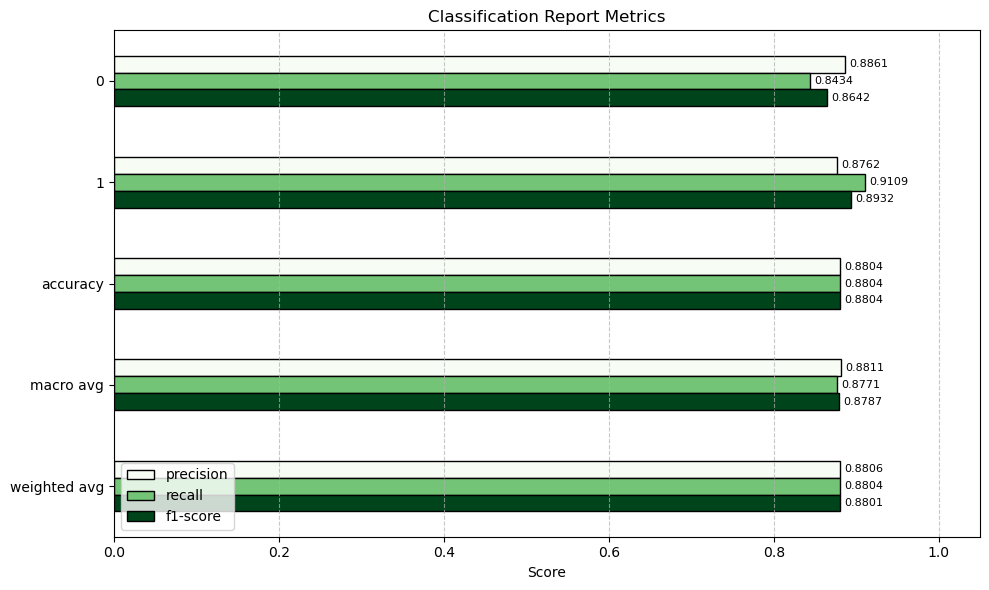

In [190]:
best_model = model_cv.best_estimator_
model_probs = best_model.predict(X_test_processed)
model_pred = (model_probs >= 0.5).astype(int)

model_cr = classification_report(y_test, model_pred, output_dict=True)
print("Accuracy: ", model_cr['accuracy'])
plot_classification_report(model_cr)

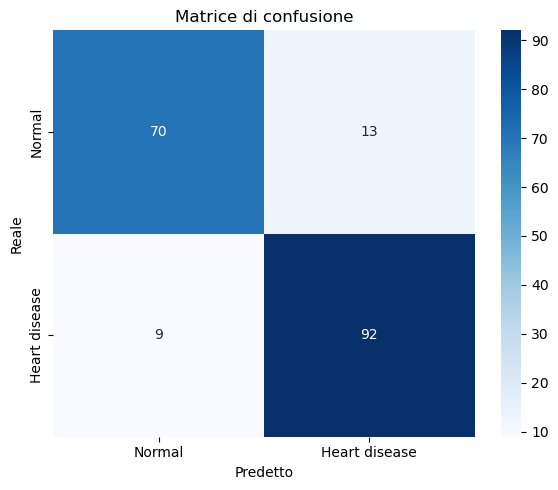

In [272]:
plot_confusion_matrix(y_test, model_pred)

Utilizzando la Grid Search le prestazioni della rete neurale si avvicinano a quelle degli altri modelli, senza però superarle, questo potrebbe essere dovuto anche alle ridotte dimensioni del dataset.

# Modelli a confronto

In [273]:
metrics = ['precision', 'recall', 'f1-score']
model_names = ['Perceptron', 'Logistic Regression', 'SVM', 'XGBoost', 'NeuralNetwork(GridSearch)']
reports = [perceptron_cr, lr_cr, svm_cr, xgb_cr, model_cr]

In [274]:
def plot_models_stats(plot_metrics=metrics, plot_model_names=model_names, model_reports=reports, stats_val='weighted avg', title='Confronto tra modelli'):
    data = []
    for name, rep in zip(model_names, reports):
        row = [rep[stats_val][metric] for metric in metrics]
        data.append(row)

    df = pd.DataFrame(data, columns=metrics, index=model_names)
    plt.figure(figsize=(16, 18))
    ax = df.plot(kind='barh', colormap='Greens', edgecolor='black')

    for container in ax.containers:
        ax.bar_label(container, fmt='%.4f', padding=5, fontsize=6)

    plt.title(title)
    plt.xlabel('Score')
    plt.xlim(0, 1.05)
    plt.yticks(rotation=0)
    plt.gca().invert_yaxis()
    plt.legend(loc='lower left')
    plt.grid(axis='x', linestyle='--', alpha=0.5)
    plt.show()
    

<Figure size 1600x1800 with 0 Axes>

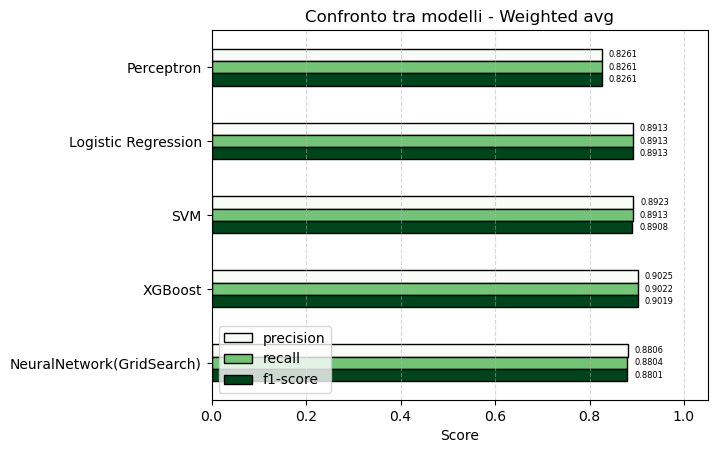

<Figure size 1600x1800 with 0 Axes>

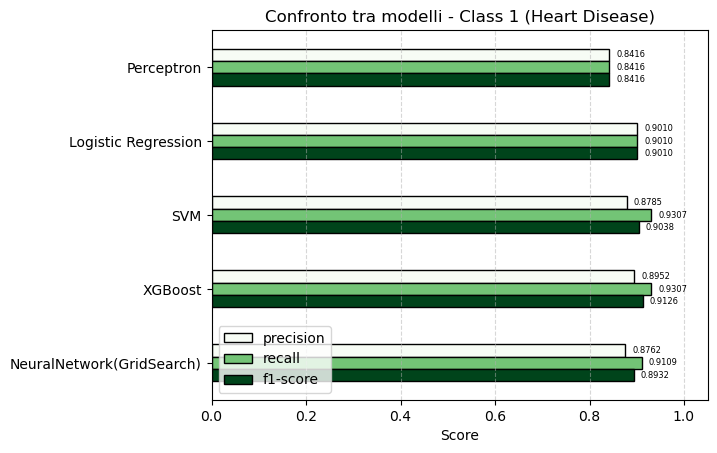

In [275]:
plot_models_stats(stats_val='weighted avg', title='Confronto tra modelli - Weighted avg')
plot_models_stats(stats_val='1', title='Confronto tra modelli - Class 1 (Heart Disease)')

I modelli (Escluso il Perceptron) risultano avere punteggi non troppo diversi tra loro. Il modello XGB appare essere il migliore considerando il *Weighted avg*, e anche se si vuole dare rilevanza alla *recall* relativa alla classe 1 (HearthDisease), il modello XGB resta comunque il migliore.

# Idee per possibili miglioramenti

Nonostante i test effettuati siano sufficientemente approfonditi, ci potrebbe essere ancora margine di miglioramento, in particolare per i modelli che si sono dimostrati più efficaci. Di seguito si presenta un elenco di alcuni test che potrebbero essere effettuati in caso si volesse tentare di migliorare i punteggi dei modelli o di verificare che quelli ottenuti siano ottimi:
- Effettuare ulteriori test riguardanti la feature *Cholesterol*, in particolare testando la sua rimozione anche nei modelli più avanzati.
- Provare ad effettuare un bilanciamento delle classi della variabile target, nonostante queste non siano particolarmente sbilanciate.
- Provare a scalare i dati utilizzando un diverso scaler.
- Accrescere le dimensioni del dataset utilizzando dati sintetici per rimediare al problema della scarsità di dati.